# Working with Time Series

Importing frameworks used

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing the data using Yahoo Finance:


In [2]:
stocks = ['AAPL', 'AMZN', 'JPM', 'JNJ']
start_date = "2020-09-01"
end_date = "2023-09-01"
prices = pd.DataFrame()
for i in stocks:
    data = yf.download(i, start_date, end_date)
    prices[i] = data['Adj Close']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


---

### Plotting the price data:

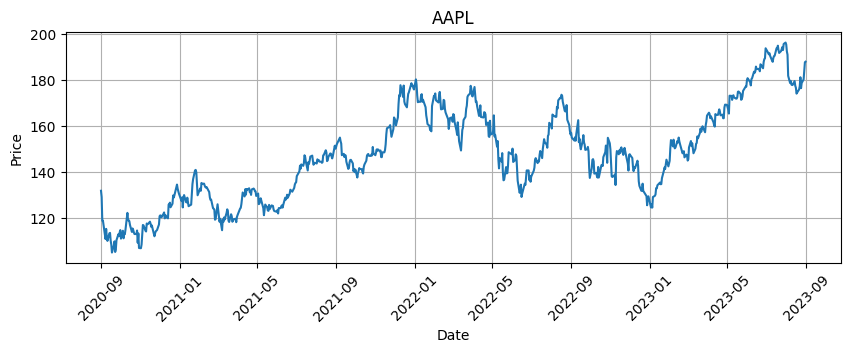

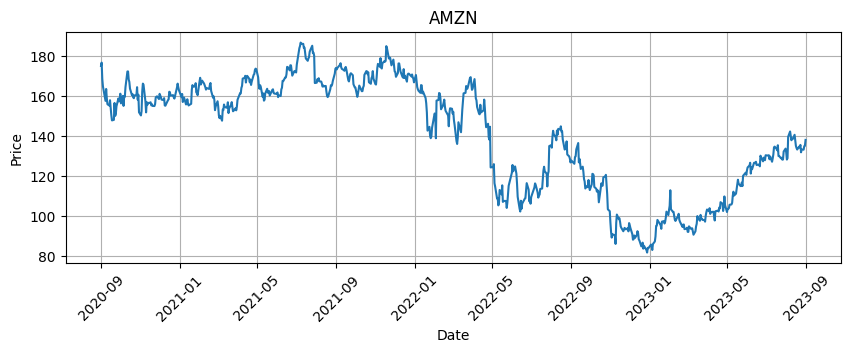

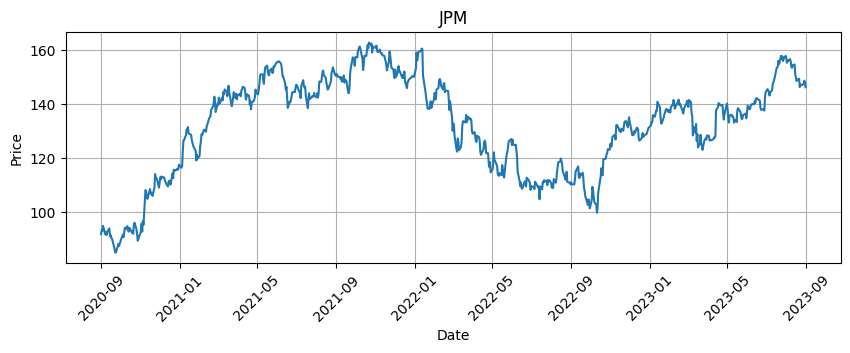

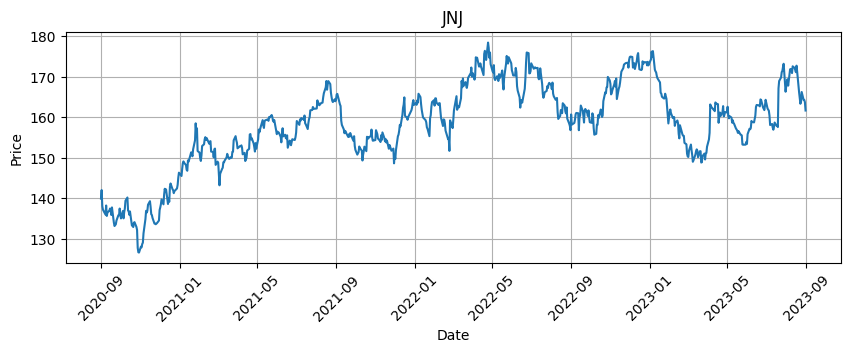

In [3]:
def lineplot (df, ticker, labeltext = 'Price'):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot (df.index, df[ticker])
    ax.set(xlabel='Date', ylabel = labeltext, title = ticker)
    ax.tick_params(axis='x', rotation=45)
    ax.grid()
    plt.show()

for i in stocks:
    lineplot(prices, i)

Now with the price percentual change:

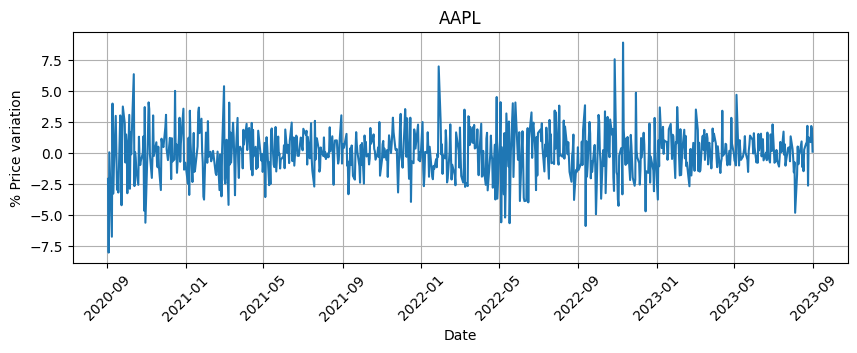

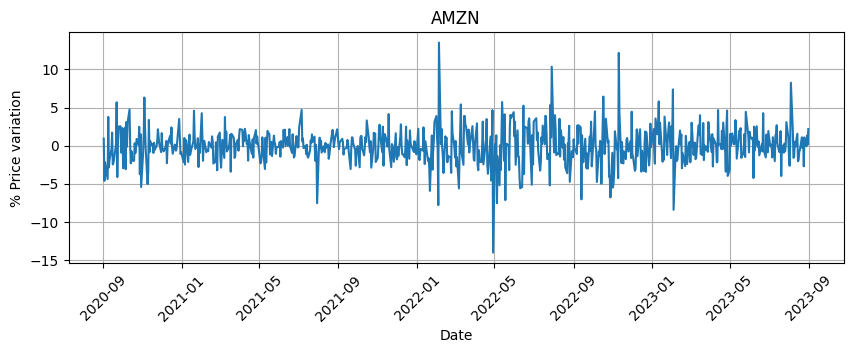

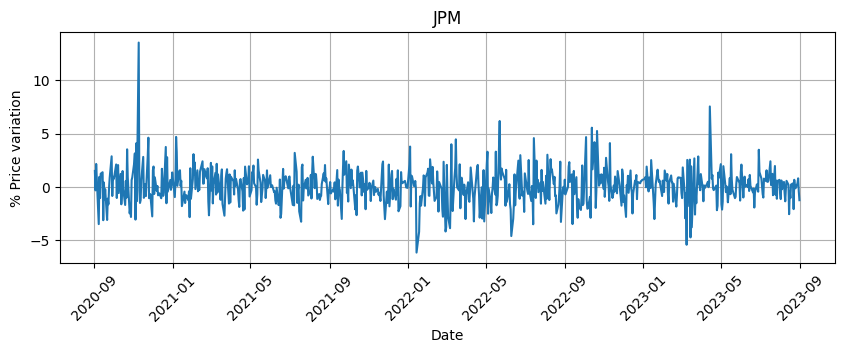

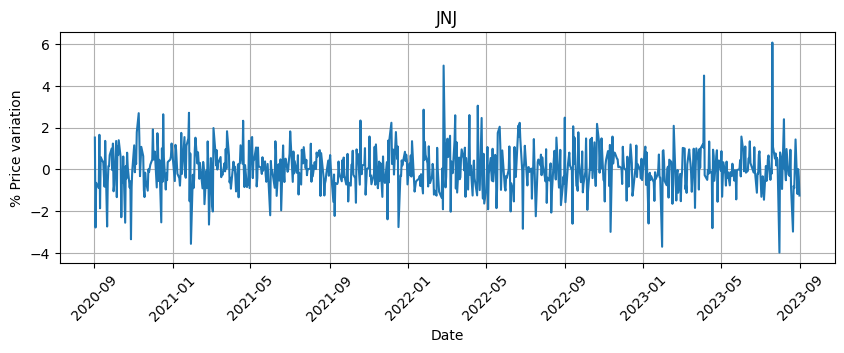

In [4]:
for i in stocks:
    lineplot(prices.pct_change()*100, i, "% Price variation")

Now it will be used the variation more frequentily, so it's reasonable to make its own dataframe

In [5]:
prices_change = prices.pct_change().dropna()*100
prices_change.head()

,AAPL,AMZN,JPM,JNJ
Date,,,,
2020-09-02,-2.071828,0.923947,1.507855,1.524578
2020-09-03,-8.006087,-4.628411,-0.314781,-2.782291
2020-09-04,0.066171,-2.178736,2.161243,-0.641938
2020-09-08,-6.729502,-4.394436,-3.477604,-0.895077
2020-09-09,3.988662,3.770662,0.950788,1.656935


---

## Removing outliers

Note: Just showing how to remove outliers, but the data will not be updated, because noise is important for future steps. Using only AAPL for example.

<br/><br/>

Detecting the existence of outliers:

Using the boxplot to check it visually.

/home/bxr/Documents/Github/.venv/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

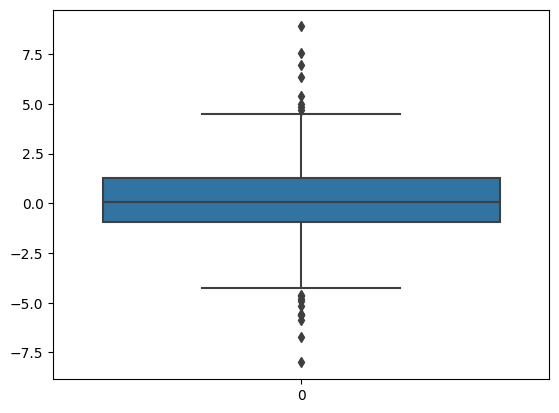

In [33]:
apple = prices_change.AAPL
sns.boxplot(apple)

The points above and under the "whiskers" are outliers observations.

<br/><br/>

Now using [Inter Quartile Range](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097) (IQR).

/home/bxr/Documents/Github/.venv/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

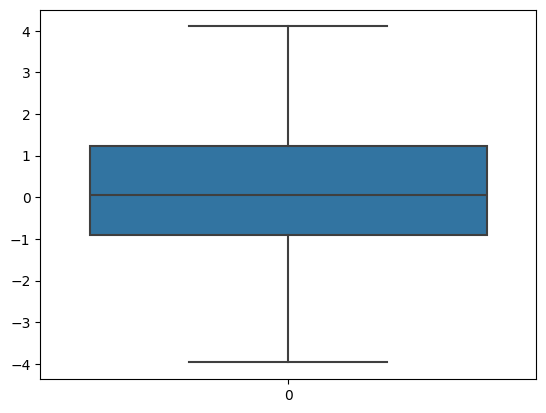

In [40]:
Q1 = np.percentile(apple, 25, method="midpoint")
Q3 = np.percentile(apple, 75, method="midpoint")
IQR = Q3 - Q1
iqroutliers = np.where((apple >= (Q3 + 1.5 * IQR)) | (apple <= (Q1 - 1.5 * IQR)))
iqroutliers = list(iqroutliers[0])
iqroutliers = [apple.index[i] for i in iqroutliers]
apple_no_outliers = apple.drop(index = iqroutliers)
sns.boxplot(apple_no_outliers)